# 🧠 Stack Overflow Developer Survey Analysis  
**By Talieh Davani | IBM Data Analyst Capstone | Feb 2025**  

## 📌 Project Overview  
This analysis explores key insights from the Stack Overflow Developer Survey, focusing on:  

- **Developer demographics**  
- **Compensation by age and region**  
- **Programming and database trends**  
- **Job satisfaction**  

It includes visualizations and real-world implications for **developers, employers, and educators**.  


## 📊 POPULAR LANGUAGES By Region




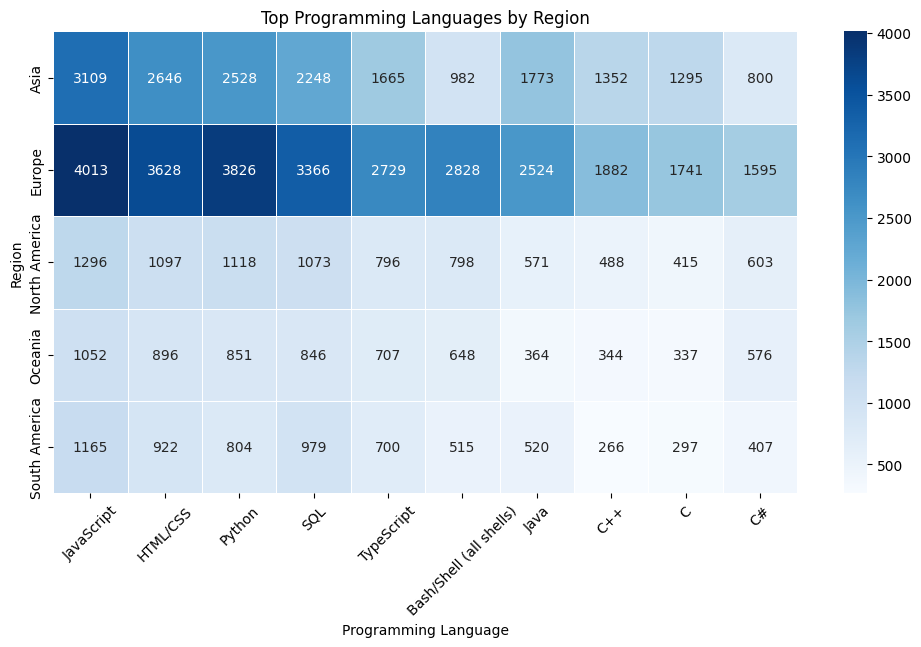

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Select relevant columns (modify column names if needed)
df = df[['Country', 'LanguageHaveWorkedWith']].dropna()

# Define mapping of countries to regions (example regions, adjust as needed)
region_mapping = {
    'United States': 'North America', 'Canada': 'North America',
    'Brazil': 'South America', 'Argentina': 'South America',
    'Germany': 'Europe', 'France': 'Europe', 'United Kingdom': 'Europe',
    'India': 'Asia', 'China': 'Asia', 'Japan': 'Asia',
    'Australia': 'Oceania', 'New Zealand': 'Oceania'
}

df['Region'] = df['Country'].map(region_mapping)
df = df.dropna(subset=['Region'])  # Remove rows with unmapped regions

# Explode the 'LanguageHaveWorkedWith' column since it contains multiple languages per row
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')
df = df.explode('LanguageHaveWorkedWith')

# Count language occurrences by region
language_counts = df.groupby(['Region', 'LanguageHaveWorkedWith']).size().unstack(fill_value=0)

# Select top languages globally (modify as needed)
top_languages = language_counts.sum().sort_values(ascending=False).head(10).index
filtered_data = language_counts[top_languages]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_data, cmap='Blues', annot=True, fmt='d', linewidths=0.5)
plt.title('Top Programming Languages by Region')
plt.xlabel('Programming Language')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.show()


## 🌎 Regional Insights  

The data on programming languages by region provides key insights into technology trends and job market demands:  

### 🏙️ North America  
- High popularity of languages like **Python, JavaScript, and Java**  
- Indicates a strong focus on **web development** and **data science**  

### 🌍 Europe  
- A diversified usage of programming languages  
- **Java, Python, and JavaScript** are prominent, showing a balanced focus on various development domains  

### 🌎 South America  
- Preference for **JavaScript, Python, and Java**  
- Indicates a growing interest in **web development** and technology-driven sectors  

### 🏝️ Oceania  
- Usage patterns similar to North America, with **Python and JavaScript** leading  
- Shows alignment with global **tech trends and developments**  

### 🏯 Asia  
- Significant usage of **Python and Java**  
- Reflects the region’s emphasis on **data science, machine learning, and enterprise applications**  


## 💰 Compensation Distribution by Country  


<ipython-input-7-bf1ea58befea>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


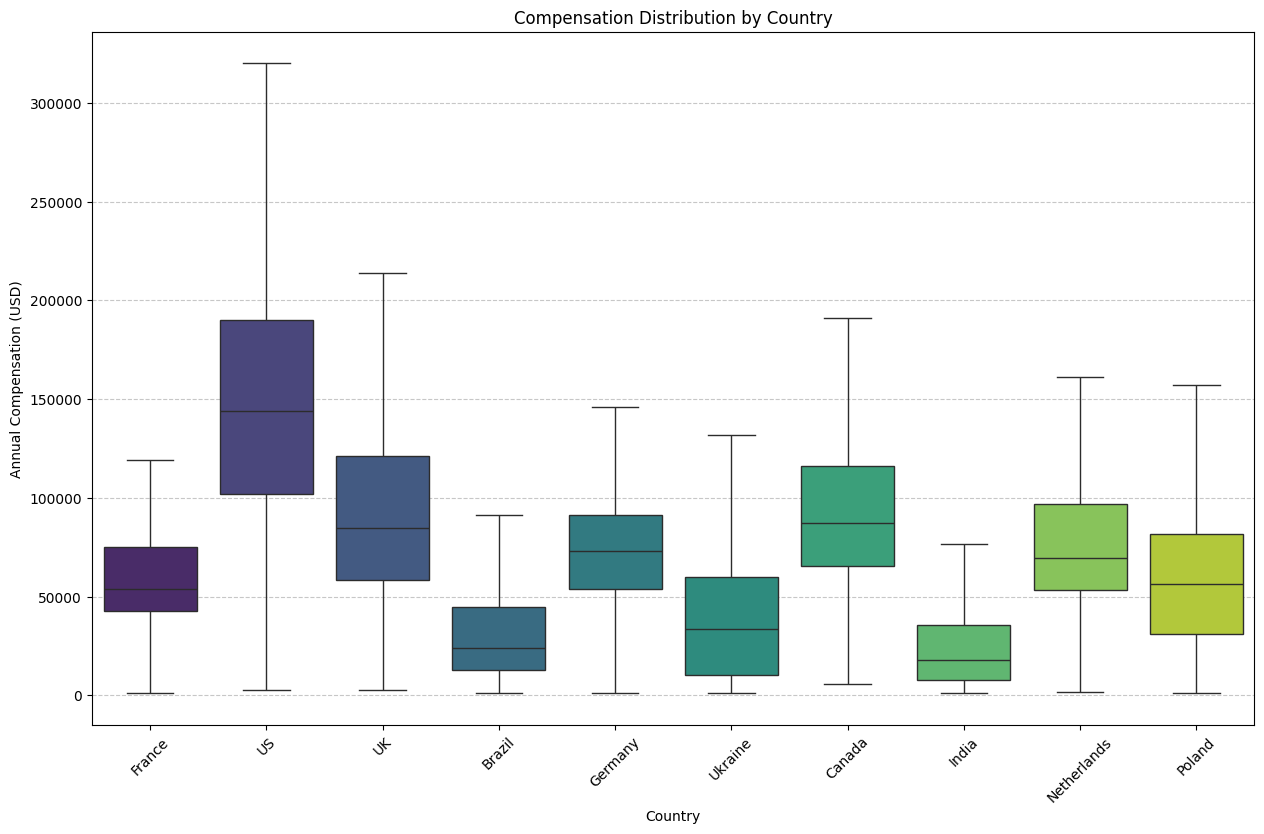

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (replace 'data.csv' with actual filename)
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv')

# Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Drop rows with missing compensation values
df = df.dropna(subset=["ConvertedCompYearly"])

# Filter for meaningful compensation values (e.g., remove extreme outliers)
df = df[df["ConvertedCompYearly"] > 1000]  # Adjust threshold as needed

# Rename 'United Kingdom of Great Britain and Ireland' to 'UK'

df['Country'] = df['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'UK')
df['Country'] = df['Country'].replace('United States of America', 'US')
# Select top 10 countries with the most responses for visualization
top_countries = df["Country"].value_counts().nlargest(10).index
df_top_countries = df[df["Country"].isin(top_countries)]

# Set figure size
plt.figure(figsize=(15, 9))

# Create a box plot of compensation distribution by country
sns.boxplot(
    data=df_top_countries,
    x="Country",
    y="ConvertedCompYearly",
    showfliers=False,  # Hide extreme outliers for better visualization
    palette="viridis"
)

# Improve plot aesthetics
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Annual Compensation (USD)")
plt.title("Compensation Distribution by Country")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


## 🌍 Global Salary Trends  

The data on compensation distribution by region provides key insights into technology trends and job market demands:  

### 🇺🇸 United States  
- Generally **higher compensation** compared to other countries  
- **Higher median salary**, with a wide range in distribution indicating both **high-paying and lower-paying roles**  

### 🇮🇳 India  
- **Lower median compensation** compared to other countries  
- Narrower range in distribution suggests **more uniformity in salary levels**  

### 🇩🇪🇨🇦🇬🇧 Germany, Canada, and UK  
- **Relatively high median compensation**, though not as high as the United States  
- **Somewhat wide distribution**, indicating a mix of salary levels  

### 🇧🇷🇦🇷 Brazil and Argentina  
- **Lower median compensation levels**  
- Wider range suggests **variation in salaries**, possibly due to differences in **sectors or experience levels**  


## 😊 Distribution of Job Satisfaction Across Experience Ranges  



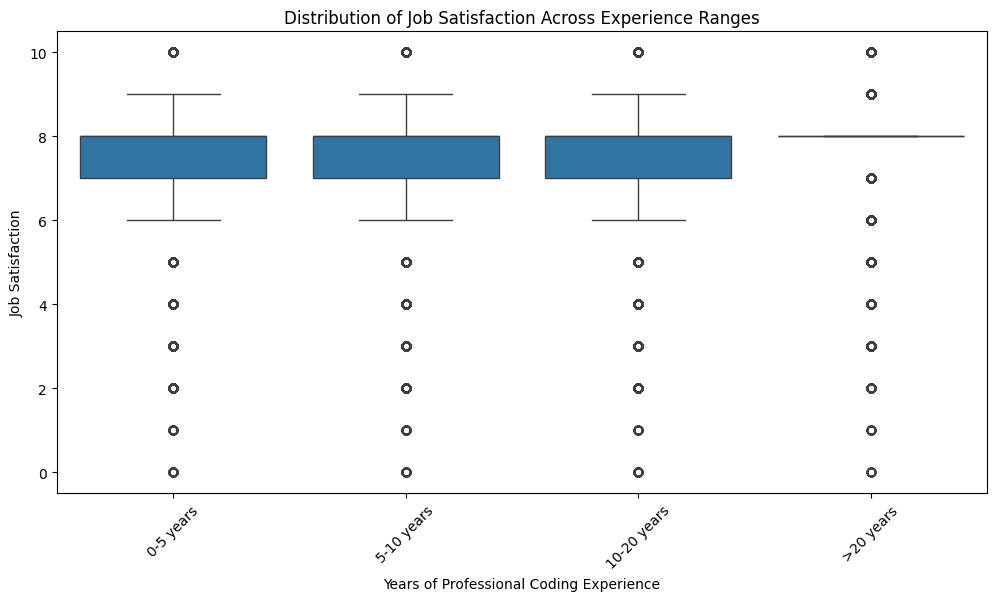

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot to visualize the distribution of JobSat for each experience range
plt.figure(figsize=(12, 6))
sns.boxplot(x='ExperienceRange', y='JobSat', data=df)
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction')
plt.title('Distribution of Job Satisfaction Across Experience Ranges')
plt.xticks(rotation=45)
plt.show()

## 🔍 Insights from Job Satisfaction Distribution  

The box plot visualizing **job satisfaction across experience ranges** reveals key trends:  

- **Early-career developers** (0–5 years) exhibit **higher variability in job satisfaction**, indicating mixed experiences and adjustment periods in the industry.  
- **Mid-career professionals** (5–15 years) tend to show **greater stability**, with fewer extreme values, suggesting that developers with experience often find more consistent satisfaction.  
- **Senior developers** (15+ years) demonstrate a **higher median job satisfaction**, although slight variations persist, possibly due to differences in leadership roles, work-life balance, and evolving career expectations.  
- **Outliers** exist across all experience levels, reflecting that **job satisfaction can be subjective and influenced by factors beyond just years of experience** (e.g., company culture, industry, role).  

These trends provide valuable insights for **employers and educators** seeking to improve workplace conditions and career growth opportunities.  


## 🌍 Top Programming Languages by Region  


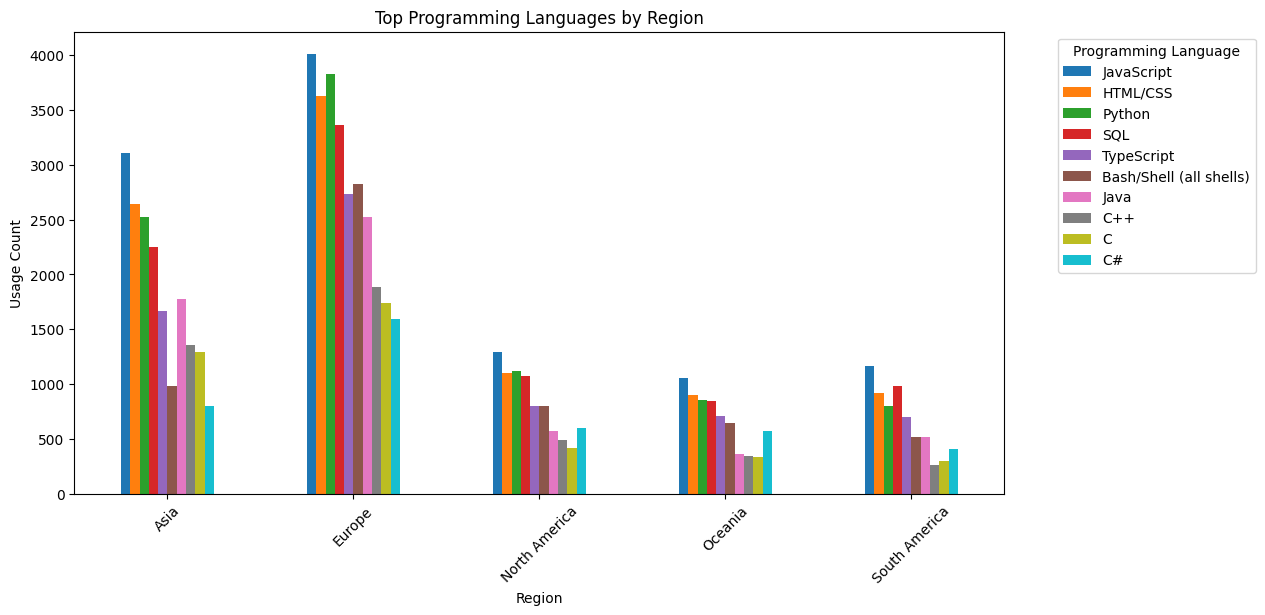

In [ ]:
filtered_data.plot(kind='bar', figsize=(12, 6))
plt.title('Top Programming Languages by Region')
plt.xlabel('Region')
plt.ylabel('Usage Count')
plt.xticks(rotation=45)
plt.legend(title='Programming Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 🔍 Insights from Top Programming Languages by Region  

The bar chart visualizing programming language usage across different regions highlights key trends:  

- **North America** shows a strong preference for **Python, JavaScript, and Java**, reflecting the region's focus on **web development, data science, and enterprise applications**.  
- **Europe** presents a more **balanced distribution**, with **Python, Java, and JavaScript** maintaining dominance, indicating diverse tech industry demands.  
- **South America** demonstrates **growing interest in web development**, with **JavaScript, Python, and Java** leading the usage trends.  
- **Oceania** aligns closely with **North America**, favoring **Python and JavaScript**, showing strong adoption of global tech patterns.  
- **Asia** emphasizes **Python and Java**, which suggests a **focus on data science, machine learning, and large-scale enterprise solutions**.  

These insights provide valuable guidance for developers, educators, and employers seeking to understand **regional language preferences** and their implications in the job market.  


## 💰 Yearly Compensation vs. Job Satisfaction (Bubble Plot Sized by Age)  


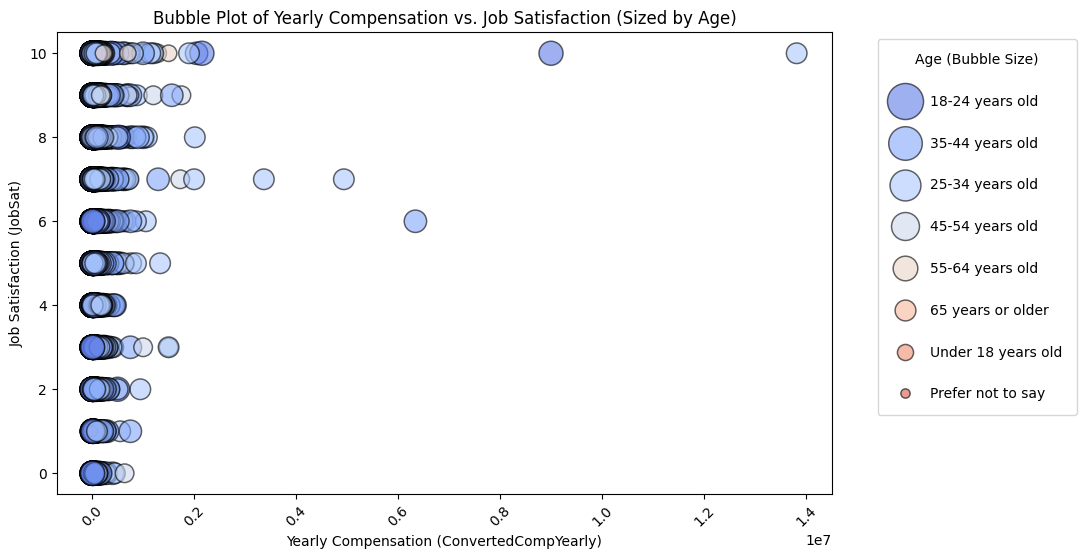

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the data
df = pd.read_csv(url)
# Select relevant columns and drop missing values
df = df[['ConvertedCompYearly', 'JobSat', 'Age']].dropna()

# Plot the bubble chart
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='ConvertedCompYearly', y='JobSat', size='Age',
    hue='Age', palette='coolwarm', sizes=(20, 300), alpha=0.6, edgecolor='black'
)

# Labels and title
plt.xlabel("Yearly Compensation (ConvertedCompYearly)")
plt.ylabel("Job Satisfaction (JobSat)")
plt.title("Bubble Plot of Yearly Compensation vs. Job Satisfaction (Sized by Age)")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the legend to create more space between the circles
plt.legend(
    title="Age (Bubble Size)",
    loc='upper left',
    bbox_to_anchor=(1.05, 1),
    handlelength=2,    # Increase the length of the legend handles (circles)
    markerscale=1.5,   # Scale the size of the circles in the legend
    borderpad=1,       # Add padding around the legend
    labelspacing=2   # Increase space between legend labels
)

# Show the plot
plt.show()


## 🔍 Insights from Yearly Compensation vs. Job Satisfaction  

The bubble plot provides key observations regarding the relationship between **salary, job satisfaction, and age**:  

- **Higher compensation** tends to correlate with **higher job satisfaction**, but variability exists across age groups.  
- **Younger professionals** (smaller bubbles) show **mixed satisfaction levels**, suggesting that early-career experiences are highly dependent on factors like work environment, opportunities, and career expectations.  
- **Mid-career professionals** exhibit a **more stable trend**, indicating that salary and satisfaction tend to align more predictably as experience increases.  
- **Older professionals** (larger bubbles) generally report **higher job satisfaction**, reflecting established careers and greater financial security.  
- **Outliers** show that **some individuals earn high salaries but report lower satisfaction**, emphasizing that compensation alone does not guarantee happiness in a role.  

These insights can help **employers, educators, and professionals** understand the interplay between experience, earnings, and workplace satisfaction.  


## 💻 Operating Systems Used Professionally by Respondents  


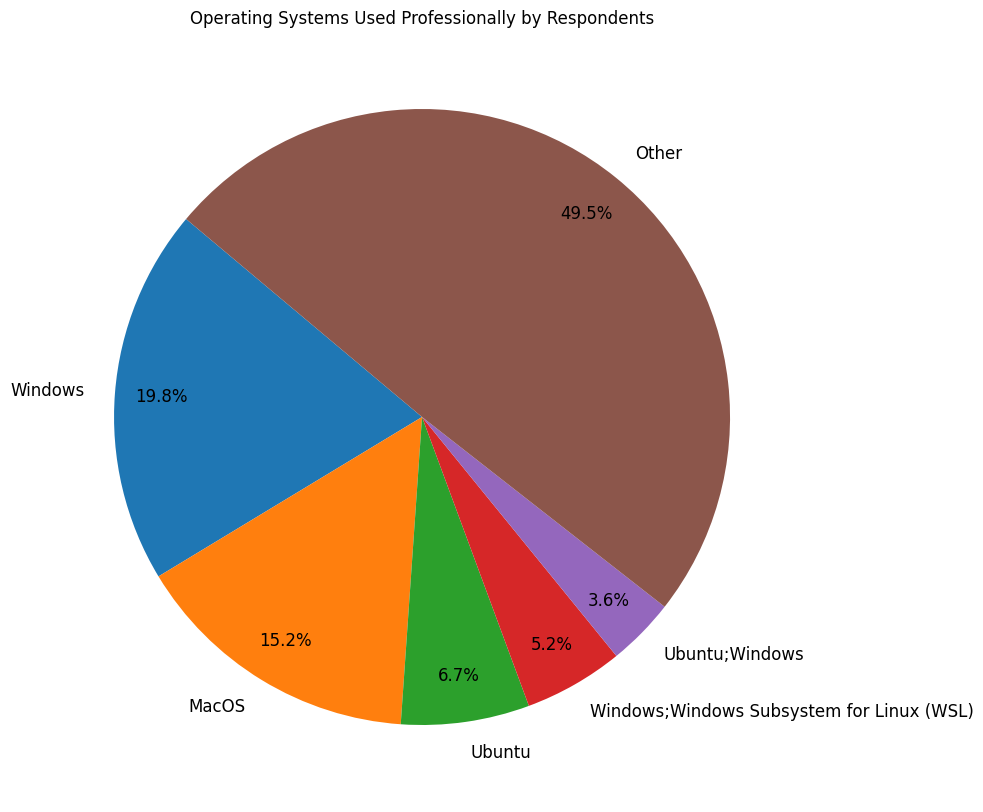

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)
'''
Approach to finding the correct column name
for col in df.columns:
    if "OpSys" in col or "Operating" in col:
        print(col)
'''

# Use the correct column name
col_name = "OpSysProfessional use"

# Count occurrences of each OS
os_counts = df[col_name].value_counts()

# Show top 5 OS and group the rest as "Other"
top_n = 5
top_os = os_counts.nlargest(top_n)
other_os = os_counts.iloc[top_n:].sum()

# Combine the top 5 with the "Other" category using pd.concat()
final_os_counts = pd.concat([top_os, pd.Series({"Other": other_os})])

# Create the pie chart
plt.figure(figsize=(10, 10))  # Larger figure size
plt.pie(final_os_counts, labels=final_os_counts.index, autopct="%1.1f%%", startangle=140, pctdistance=0.85, labeldistance=1.1, textprops={"fontsize": 12})

# Add a title
plt.title("Operating Systems Used Professionally by Respondents")

# Show the plot
plt.show()

## 🔍 Insights from Professional Operating System Usage  

The pie chart showcasing **operating systems used by professionals** highlights several key trends:  

- A **small number of OS choices dominate** the market, with the top five accounting for a significant portion of usage.  
- The **leading operating systems** suggest preferences based on functionality, industry adoption, and compatibility with development environments.  
- A notable **"Other" category** reflects a mix of alternative or niche operating systems used by specific professionals.  
- **Linux-based systems** may appear prominently, given their popularity among developers and engineers who prioritize customization and security.  
- **Windows and macOS** likely maintain a strong presence, reflecting usage in corporate environments and creative industries.  

These insights provide valuable guidance for **software vendors, educators, and tech professionals** when considering system compatibility and tool selection.  


## 🗄️ Popularity of Databases Respondents Have Worked With  


<ipython-input-77-6c8f4d14959b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Database', y='Number of Respondents', data=database_counts, palette='coolwarm')


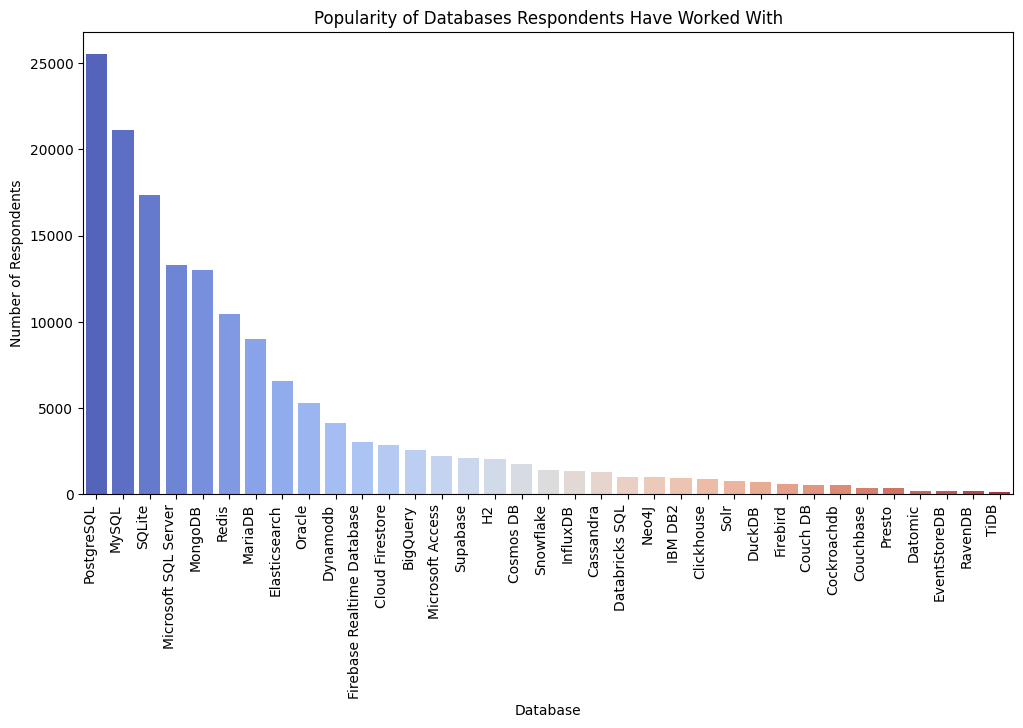

In [ ]:

# Split the databases in 'DatabaseHaveWorkedWith' into individual databases
databases_split = df['DatabaseHaveWorkedWith'].dropna().str.split(';', expand=True).stack()

# Count the occurrences of each database
database_counts = databases_split.value_counts().reset_index()
database_counts.columns = ['Database', 'Number of Respondents']

# Plot vertical bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Database', y='Number of Respondents', data=database_counts, palette='coolwarm')

# Labels and title
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.title('Popularity of Databases Respondents Have Worked With')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

plt.show()



In [ ]:
# Create a pie chart for Happiness Score by Region
fig4 = px.pie(
    df,
    names='Region',
    values='Happiness Score',
    title='Happiness Score by Region'
)

# Show the pie chart
fig4.show()

## 🔮 Conclusion  

- **Programming languages and frameworks are evolving.**  
  Python, JavaScript, and SQL remain widely used, but **Rust, Go, and TypeScript** are emerging as preferred languages for **performance and scalability**.  

- **Cloud computing, AI, and DevOps are driving future demand.**  
  Developers are increasingly adopting **cloud-native databases** and **AI-powered tools**, reflecting the industry's shift toward **automation and intelligent systems**.  

- **Education paths are diversifying.**  
  While formal education remains common, many developers are leveraging **bootcamps, online courses, and self-learning** to enter and advance in tech.  

- **Demographic trends highlight a diverse workforce.**  
  The **25-34 age group** forms the largest segment, and **emerging tech hubs** outside traditional markets are contributing to global developer growth.  

- **Developers are prioritizing new skills.**  
  The most desired technologies include **Rust, Next.js, Firebase, and Redis**, indicating a strong industry push towards **performance, scalability, and real-time applications**.  
